<a href="https://colab.research.google.com/github/cembozok/uncertainty/blob/main/Simple%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def imshow(img):
    img = img / 2 + 0.5     # Entnormieren
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

100%|██████████| 170498071/170498071 [00:01<00:00, 90813584.23it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data


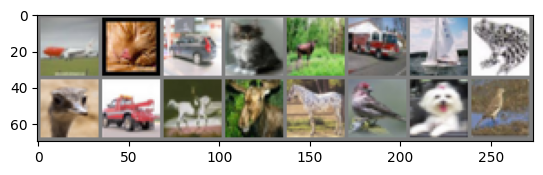

In [4]:
# Lade den CIFAR-10 Datensatz und erstelle den Datenlader
# Transformationen für den CIFAR-10 Datensatz
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)
# Batches von Trainingsdaten abrufen und anzeigen
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Bilder anzeigen
imshow(torchvision.utils.make_grid(images))

## Ein einfaches NN, basierend auf CIFAR Trainingsdaten

In [5]:
# Lade den CIFAR-10 Datensatz und erstelle den Datenlader
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Definition des einfachen Modells
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Modell erstellen
model = SimpleModel()

# Loss-Funktion und Optimierer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Trainingsschleife
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            #print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

Files already downloaded and verified
Finished Training


## Das Model einsetzen um zu Klassifizieren

In [ ]:
# Transformationen für das Testbild
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Lade den CIFAR-10 Testdatensatz
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

# Klassenbezeichnungen für CIFAR-10
classes = ('Flugzeug', 'Auto', 'Vogel', 'Katze', 'Hirsch', 'Hund', 'Frosch', 'Pferd', 'Schiff', 'Lkw')

# Modell verwenden, um Vorhersagen zu treffen
model.eval()  # Setze das Modell in den Evaluationsmodus
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Zeige exemplarisch 4 Vorhersagen an
        if total < 4:
            imshow(torchvision.utils.make_grid(images))
            print('Vorhersagte Klassen:', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Ausgabe der Genauigkeit
print(f'Genauigkeit des Modells auf {total} Testbildern: {100 * correct / total:.2f}%')

## Versuch die Genauigkeit zu erhöhen
In diesem Beispiel wurde die Architektur des Modells zu einem CNN erweitert und Data Augmentation in den Transformationen für den Trainingsdatensatz hinzugefügt. Diese Änderungen sollten die Leistung des Modells verbessern.

In [ ]:
# Definition des CNN-Modells
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 128 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        return self.fc2(x)

# Modell erstellen
model = CNNModel()

# Loss-Funktion und Optimierer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trainingsschleife
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            #print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')


# Evaluierung auf Testdatensatz
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Genauigkeit des Modells auf {total} Testbildern: {100 * correct / total:.2f}%')
